In [1]:
from tensorial_algebra import *
from utils import *
from frictions import * 

**The setup.** We fix a finite horizon $T > 0$ and a filtered probability space $(\Omega, \mathscr F, (\mathscr F_t)_{t\in [0,T]}, \mathbb{P})$ with filtration $(\mathscr F_t)_{t\in [0,T]}$ that satisfies the usual conditions. We consider a financial market with a tradable asset $(S_t)_{t\in [0,T]}$ with dynamic : 
$$dS_t = \mu \, dt + \sigma\, dW_t, \quad t\leq T,$$
with $\mu \in \mathbb R$, $\sigma \in \mathbb R_+$ and $W$ a standard Brownian motion. In this financial market, a trader shorts an option on $S$.  We assume that by trading the asset, the trader incurs both temporary and permanent market impacts which affect the $\text{P\&L}$. More precisely, if $(X_t^\theta)_{t\in [0,T]}$ denotes the number of shares held by the trader through time defined as: 
$$X_t^\theta = X_0 + \int_0^t \theta_s\, ds,$$
with $X_0 \in \mathbb R$, and $(\theta_t)_{t\in [0,T]}$ the trading speed. 

The price of the asset, taking account of permanent impact, is given by 
$$P_t^\theta = S_t + \nu(X_t^\theta - X_0), \quad t\leq T,$$
with $\nu\geq0$ the permanent market impact parameter. Moreover, as the trader incurs transaction costs (temporary impact), the effective traded asset price is 
$$\widetilde P_t^\theta = P_t^\theta + \eta \theta_t,\quad t\leq T,$$
with $\eta \geq 0$ the temporary price impact parameter. 

Formally, the trader aims to optimally hedge a signature payoff given by
$$H_T^\theta = \left\langle \xi, \widehat{\mathbb{P}}_T^\theta\right\rangle,$$
with $\xi \in T^{M}(\mathbb R^2)$ for some $M > 0$. In this notebook, we restrict our attention to cases where the payoff functional $\xi$ is explicit (see below). For general path-dependent payoffs without closed-form signature representations, see `non-signature-path-dependent-payoffs.ipynb`.

Before starting, lets define the following quantities: 
$$\xi_t := \xi\big|_{\mathcal E_{T-t}}, \qquad \mathcal E_t := \exp_{\otimes}\left(\left({\color{navy}{\mathbf{1}}} + \dfrac{\sigma^2}{2}{\color{navy}{\mathbf{22}}}\right)t\right), \qquad \exp_\otimes(\ell) := \sum_{k\geq0} \frac{\ell^{\otimes k}}{k!}.$$

In [120]:
N = 200
S0, K = 10, 10 
mu, sigma = 0, 2 
x0 = 2 * N * (S0 - K)   
T = 0.2
eta, nu, lambd = 0.001, 0.001, 0.01

n = 252
dt = T/n
t_grid = np.linspace(0, T, n+1) 
N_mc = 10
W = generate_brownian_paths(N_mc, n, T, antithetic=False)

**Theorem.** Let us define $\widehat Z_t^\theta := (t,P_t^\theta, X_t^\theta)$ and suppose that there exists $(\psi_t)_{t\in [0,T]}$ solution of the folowong infinite-dimensional system of Riccati equations: 
\begin{align*} 
\dot{\psi}_t &= -\psi_t\big|_{{\color{navy}{\mathbf{1}}}} - \frac{\sigma^2}{2}\psi_t\big|_{{\color{navy}{\mathbf{22}}}} - \frac{\lambda}{2}\sigma^2\left({\color{navy}{\mathbf{3}}} + {\color{navy}{\obar}} X_0 - \widetilde \xi_t\right)^{\shuprod 2} + \frac{1}{4\eta}\left[\nu({\color{navy}{\mathbf{3}}} + {\color{navy}{\obar}} X_0 - \widetilde\xi_t ) - (\nu\psi_t\big|_{{\color{navy}{\mathbf{2}}}} + \psi_t\big|_{{\color{navy}{\mathbf{3}}}})\right]^{\shuprod 2} + \mu\left[({\color{navy}{\mathbf{3}}} + {\color{navy}{\obar}} X_0 - \widetilde \xi_t) - \psi_t\big|_{{\color{navy}{\mathbf{2}}}}\right],\\
\psi_T &= 0,
\end{align*}
where $\widetilde\xi_t$ is defined, for all ${\color{navy}{\mathbf{w}}} = {\color{navy}{\mathbf{i_1\ldots i_n}}}$ with $n \in \mathbb N$ by 
$$\begin{cases}
0, &\text{if }\exists k \in \{1,\ldots, n\} \text{ such that } {\color{navy}{\mathbf{i_k}}} = {\color{navy}{\mathbf{3}}},\\
\big(\xi_t\big|_{{\color{navy}{\mathbf{2}}}}\big)^{{\color{navy}{\mathbf{w}}}}, &\text{if }\nexists k \in \{1,\ldots, n\} \text{ such that } {\color{navy}{\mathbf{i_k}}} = {\color{navy}{\mathbf{3}}}.
\end{cases}$$
Under mild assumptions, there exists an optimal control $\theta^\star$ satisfying the feedback equation 
$$\theta^\star_t = \frac{1}{2\eta}\left[\nu\left(X_t^{\theta^\star} - \left\langle \xi_t\big|_{{\color{navy}{\mathbf{2}}}}, \widehat{\mathbb{P}}_t^{\theta^\star}\right\rangle\right) - \left\langle \nu\psi_t\big|_{{\color{navy}{\mathbf{2}}}} + \psi_t\big|_{{\color{navy}{\mathbf{3}}}}, \widehat{\mathbb{Z}}_t^{\theta^\star}\right\rangle\right].$$ 

## I. European quadratic payoff 

$\newcommand{\obar}{\mathord{\text{o}\!\!\!/\ }}$ The payoff is given by $H_T^\theta = \displaystyle\sum_{k=0}^N \alpha_k \left(P_T^\theta-K\right)^k$. By construction: 
$$\left\langle {\color{navy}{\mathbf{2}}},\, \widehat{\mathbb{P}}_T^\theta\right\rangle = \left(\widehat{\mathbb{P}}_T^\theta\right)^{{\color{navy}{\mathbf{2}}}}= \int_0^T 1 \circ d\left(\widehat{P}_t^\theta\right)^{{\color{navy}{\mathbf{2}}}} = P_T^\theta - P_0^\theta, \qquad \left\langle {\color{navy}{\obar}} ,\,\widehat{\mathbb{P}}_T^\theta\right\rangle = 1.$$ 
Therefore, 
\begin{align*}
H_T^\theta = \sum_{k=0}^N \alpha_k \left(P_T^\theta-K\right)^k= \sum_{k=0}^N \alpha_k \left(\left\langle {\color{navy}{\mathbf{2}}} + {\color{navy}{\obar}}(P_0^\theta - K),  \widehat{\mathbb{P}}_T^\theta \right\rangle\right)^k &= \sum_{k=0}^N \alpha_k  \left\langle \left({\color{navy}{\mathbf{2}}} + {\color{navy}{\obar}}(P_0^\theta - K)\right)^{\shuprod k}, \widehat{\mathbb{P}}_T^\theta\right\rangle \\
&= \Bigg\langle \underbrace{\sum_{k=0}^N \alpha_k\left({\color{navy}{\mathbf{2}}} + {\color{navy}{\obar}}(P_0^\theta - K)\right)^{\shuprod k}}_{=\xi}, \widehat{\mathbb{P}}_T^\theta \Bigg\rangle
\end{align*}
In the sequel, we'll take $\alpha_k = N\mathbf{1}_{k=2}$. This leads to 
\begin{align*}
\xi &= N \left(2 \cdot {\color{navy}{\mathbf{22}}} + 2(P_0^\theta - K) \cdot {\color{navy}{\mathbf{2}}} + (P_0^\theta - K)^2 \cdot {\color{navy}{\obar}}\right) = N \left(2 \cdot {\color{navy}{\mathbf{22}}} + 2(S_0 - K) \cdot {\color{navy}{\mathbf{2}}} + (S_0 - K)^2 \cdot {\color{navy}{\obar}}\right)
\end{align*}

In [130]:
d = 3 
M = 2 
tilde_M = 2 * M 
Gamma = 2 * N
xi = {() : (S0-K)**2 * N, 
      (2,) : 2 * (S0-K) * N, 
      (2, 2) : Gamma}

### I.1 Closed form

$$\theta_t^\star = \dfrac{\nu-f(t)(1-\nu\Gamma)}{2\eta}\left(X_t^{\theta^\star} - \left\langle \xi_t\big|_{{\color{navy}{\mathbf{2}}}}, \widehat{\mathbb{P}}_t^{\theta^\star}\right\rangle\right), \qquad f(t) = \frac{1}{2(1-\nu\Gamma)}\left[\nu + c \tanh\left(\frac{c(1-\nu\Gamma)}{2\eta}(T-t)-\frac{1}{2}\ln \left(\frac{c+\nu}{c-\nu}\right)\right)\right], \qquad c = \sqrt{2\eta\lambda\sigma^2}.$$

In [13]:
X_close, S_close, P_close, theta_close = compute_theta_closed_europ(T, S0, x0, mu, sigma, eta, nu, lambd, xi, W, M)

### I.2 Riccati 

In [16]:
projectors, tuples = get_projectors_tuples_extended(d, tilde_M)
psi = compute_psi(T, n, x0, mu, sigma, eta, nu, lambd, xi, d, M, projectors, tuples)

In [18]:
words_at_index, word_to_index = precompute_words_and_indices(d, tilde_M)

In [20]:
X, S, P, theta = compute_theta(T, S0, x0, mu, sigma, eta, nu, lambd, psi, xi, W, M)

### I.3 Some sanity checks

**Check 1:** Comparison of trajectories

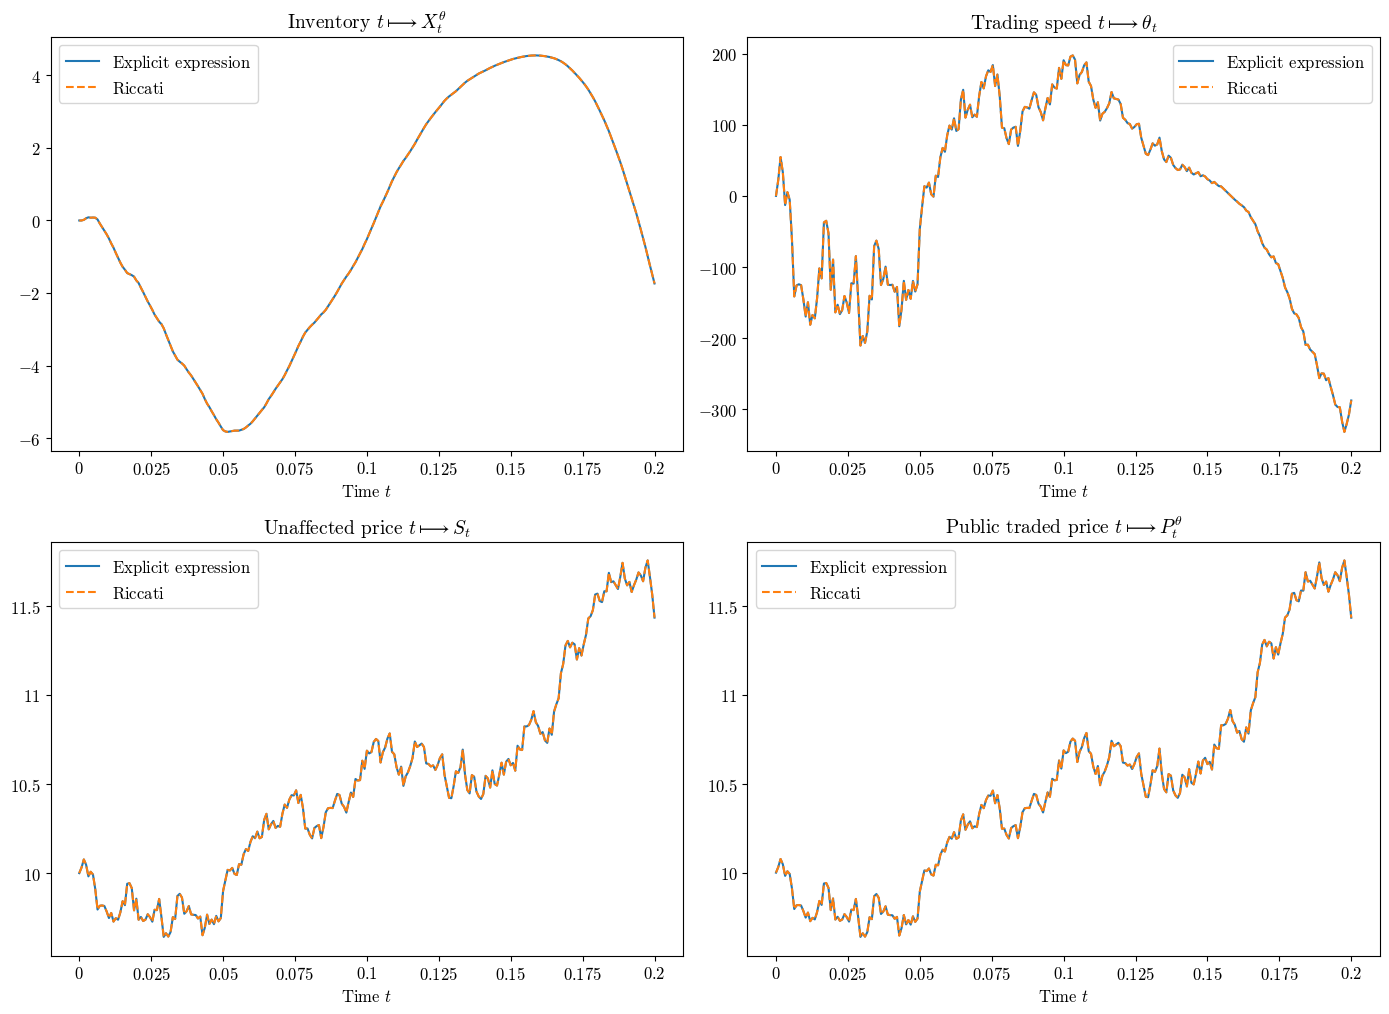

In [24]:
n_test = 6
plot_sanity_check(X[n_test], X_close[n_test], S[n_test], S_close[n_test], P[n_test], P_close[n_test], theta[n_test], theta_close[n_test], t_grid)

**Check 2:** Closed-form of the Riccati solution $$\psi_t = f(t)\left[{\color{navy}{\mathbf{3}}} +X_0 \cdot {\color{navy}{\obar}} -\widetilde{\xi}_t\right]^{\shuprod 2} + \sigma^2\int_t^T f(s)\Gamma^2\, ds \cdot{\color{navy}{\obar}}$$

In [27]:
np.abs(compute_psi_closed_europ(T, x0, n, sigma, eta, nu, lambd, xi, M) - psi[0,0])

9.943320316097015e-05

**Check 3:** The Bachelier's price at time $0$ coincide with $\left\langle \xi_0, \widehat{\mathbb{S}}_0\right\rangle = \xi_0^{\color{navy}{\mathord{\text{o}\!\!/\ }}}$. 

In [30]:
_, xi_t, _, _ = compute_tilde_xi_t(T, n, sigma, xi, d, M)
print("Bachelier price  = ", N*((S0-K)**2 + sigma**2 * T))
print("Bachelier price with xi = ", xi_t[0,0])

Bachelier price  =  160.0
Bachelier price with xi =  160.0


### I.4. Regression 

This subsection is not directly relevant here since $\xi$ is explicit; its purpose is rather to sanity-check the regression procedure. For more details, `non-signature-path-dependent-payoffs.ipynb`.

In [32]:
N_mc = 10000
W_mc = generate_brownian_paths(N_mc, n, T)
Y = simulate_Bachelier(S0, T, mu, sigma, W_mc)

H = N * (Y[:, -1] - K)**2
M = 2
tilde_M = 2 * M 
d = 2
S = signatures_time_augmented(Y, T, M)

In [33]:
l0, l, alpha_star, model = fit_Ridge_CV(S, H)
l_dict = vector_to_dict(l, d, M)
l_dict[()] = l0 

In [34]:
d = 3
projectors, tuples = get_projectors_tuples_extended(d, tilde_M)
psi = compute_psi(T, n, x0, mu, sigma, eta, nu, lambd, l_dict, d, M, projectors, tuples)

In [36]:
X_test, S_test, P_test, theta_test = compute_theta(T, S0, x0, mu, sigma, eta, nu, lambd, psi, l_dict, W, M)

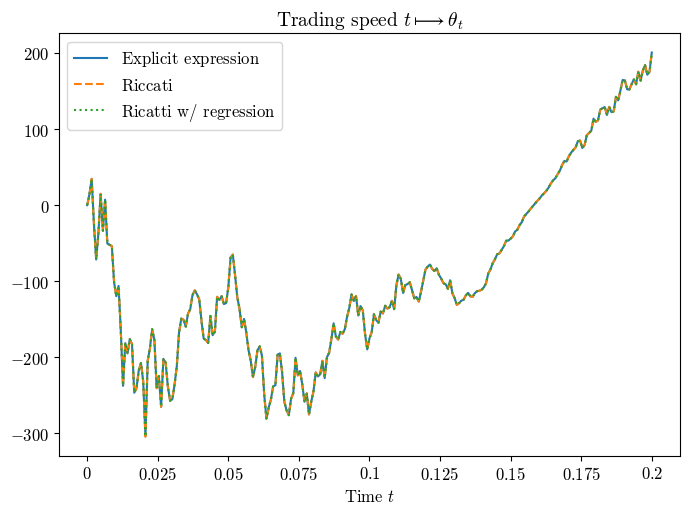

In [40]:
fig, ax = plt.subplots(figsize=(7,5.25))

n_test = 1 

ax.plot(t_grid, theta_close[n_test], label = r"$\text{Explicit expression}$")
ax.plot(t_grid, theta[n_test], label = r"$\text{Riccati}$", linestyle ="--")
ax.plot(t_grid, theta_test[n_test], label = r"$\text{Ricatti w/ regression}$", linestyle =":")

ax.set_xlabel(r"$\text{Time }t$", fontsize=12)
ax.tick_params(axis='both', labelsize=12)
ax.set_title(r"$\text{Trading speed }t\longmapsto\theta_t$", fontsize=14)
ax.xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax.yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

## II. Asian quadratic payoff 

$\newcommand{\shuprod}{\mathrel{\sqcup \mkern -3.2mu \sqcup}}$ The payoff is given by $H_T^\theta = \displaystyle\sum_{k=0}^N \alpha_k \left(\dfrac{1}{T}\int_0^T P_t^\theta\, dt - K\right)^k $. It is clear that  

\begin{align*}
H_T^\theta = \sum_{k=0}^{N} \alpha_k \left(\dfrac{1}{T}\int_0^T P_t^\theta\, dt - K\right)^k = \sum_{k=0}^N \alpha_k \left(\left\langle\ \frac{1}{T}{\color{navy}{\mathbf{21}}} + (P_0^\theta-K){\color{navy}{\obar}}, \widehat{\mathbb{P}}_T^\theta\right\rangle\right)^k &=  \sum_{k=0}^N \alpha_k \left\langle \left(\frac{1}{T}{\color{navy}{\mathbf{21}}} + (P_0^\theta-K){\color{navy}{\obar}}\right)^{\shuprod k }, \widehat{\mathbb{P}}_T^\theta\right\rangle \\
&= \Bigg\langle \underbrace{\sum_{k=0}^N \alpha_k \left(\frac{1}{T}{\color{navy}{\mathbf{21}}} + (P_0^\theta-K){\color{navy}{\obar}}\right)^{\shuprod k }}_{=\xi}, \widehat{\mathbb{P}}_T^\theta \Bigg\rangle 
\end{align*}
In the sequel, we'll take $\alpha_k = N\mathbf{1}_{k=2}$. This leads to 
\begin{align*}
\xi &= N \left(\frac{4}{T^2}\cdot{\color{navy}{\mathbf{2211}}} + \frac{2}{T^2}\cdot{\color{navy}{\mathbf{2121}}} +  \frac{2(S_0-K)}{T}\cdot{\color{navy}{\mathbf{21}}} + (S_0-K)^2\cdot{\color{navy}{\obar}}\right) 
\end{align*}


In [47]:
d = 3
M = 4
tilde_M = 2 * M 
N = 200
Gamma = 2 * N 
xi = {() : (S0-K)**2 * N, 
      (2,1) : 2 * (S0-K) / T * N, 
      (2, 1, 2, 1) : 2 / T**2 * N, 
      (2, 2, 1, 1) : 4/T**2 * N}

### II.1 Calculations 

#### II.1.1 Closed form 

We no longer have an explicit expression for the optimal trading speed, except for $\nu=0$. In this case: 

$$\theta_t^\star = \frac{1}{\eta}f(t)\left(\left\langle \widehat{\xi}_t, \widehat{\mathbb{Z}}_t^{\theta^\star} \right\rangle - X_t^{\theta^\star}\right), \quad \widehat{\xi}_t := \int_t^T K(t,s) \widetilde{\xi}_{s}\big|_{\widetilde{\mathcal E}_{s-t}}\, ds, \quad K(t,s) := \dfrac{c\cosh\left(\tfrac{c(T-s)}{\eta}\right)}{\eta\sinh\left(\tfrac{c(T-t)}{\eta}\right)}\mathbf{1}_{t < s < T}, \quad f(t) := c\tanh\left(\tfrac{c(T-t)}{\eta}\right), \quad c = \sqrt{\frac{\lambda\sigma^2\eta}{2}}.$$

In [52]:
nu = 0 # no permanent market impact
mu = 0 

In [54]:
X_close, S_close, P_close, theta_close = compute_theta_closed_asian(T, S0, x0, mu, sigma, eta, nu, lambd, xi, W, M)

#### II.1.2 Riccati 

In [57]:
projectors, tuples = get_projectors_tuples_extended(d, tilde_M)

In [59]:
nu_values = [0, 0.0005, 0.001, 0.0015] 
psi_traj = []
for nu in nu_values : 
    psi = compute_psi(T, n, x0, mu, sigma, eta, nu, lambd, xi, d, M, projectors, tuples, verbose=True)
    psi_traj.append(psi)

100%|█████████████████████████████████████████| 252/252 [00:11<00:00, 22.51it/s]


In [61]:
n_test = 0 
X_traj = []
theta_traj = []
for i, nu in enumerate(tqdm(nu_values)) : 
    X, S, P, theta = compute_theta(T, S0, x0, mu, sigma, eta, nu, lambd, psi_traj[i], xi, W, M)
    X_traj.append(X[n_test])
    theta_traj.append(theta[n_test]) 

100%|█████████████████████████████████████████████| 4/4 [00:03<00:00,  1.04it/s]


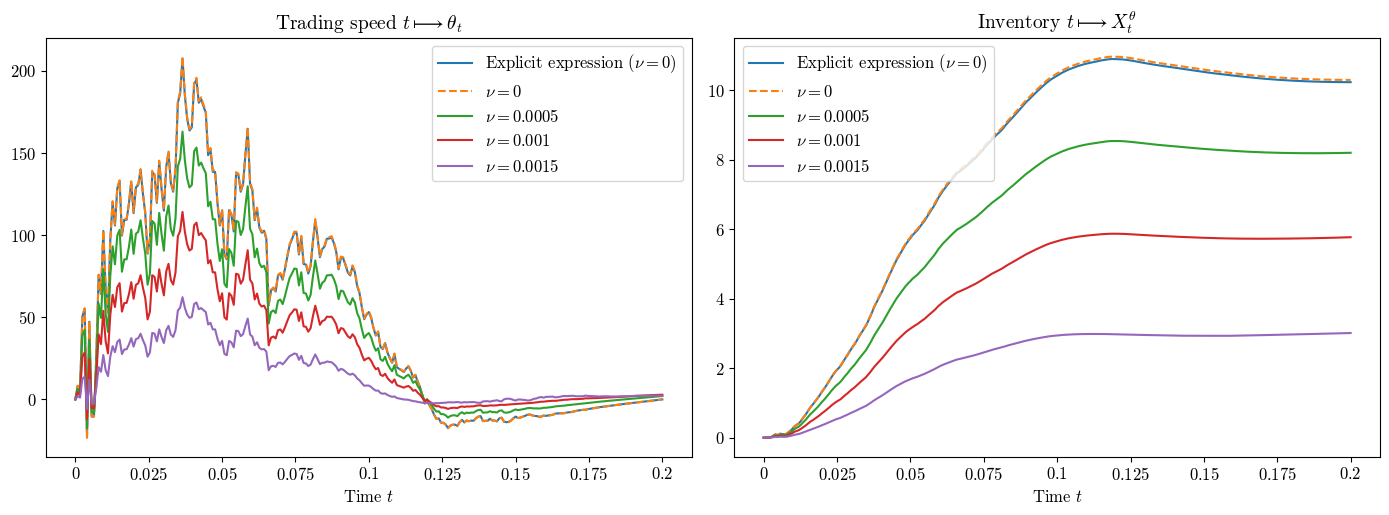

In [77]:
plot_multiple_nu(nu_values, theta_traj, X_traj, theta_close[n_test], X_close[n_test], t_grid)

When permanent market impact is introduced (i.e. when $\nu>0$), a gap appears whose magnitude increases with the value of the permanent impact parameter $\nu$. As expected, the larger $\nu$ is, the slower and flatter the resulting trading speed becomes.

#### II.1.3. Indifference prices and some sanity checks 

In [80]:
_, xi_t, _, _ = compute_tilde_xi_t(T, n, sigma, xi, d, tilde_M)

In [81]:
print("Bachelier price : ", N * ((S0- K)**2 + sigma**2 * T/3))
for i in range(4) : 
    print(f"Indifference price for nu = {nu_values[i]} : ", psi_traj[i][0, 0] + xi_t[0,0])

Bachelier price :  53.333333333333336
Indifference price for nu = 0 :  79.68103465307048
Indifference price for nu = 0.0005 :  80.56766288108484
Indifference price for nu = 0.001 :  81.22688561215207
Indifference price for nu = 0.0015 :  81.62511357729247


In [84]:
print("Bachelier price  = ", N*((S0-K)**2 + sigma**2 * T/3))
print("Bachelier price with signatures = ", xi_t[0,0]) 

Bachelier price  =  53.333333333333336
Bachelier price with signatures =  53.33333333333333


### II.2 Regression 

This subsection is not directly relevant here since $\xi$ is explicit; its purpose is rather to sanity-check the regression procedure. For more details, `non-signature-path-dependent-payoffs.ipynb`.

In [88]:
N_mc = 10000
W_mc = generate_brownian_paths(N_mc, n, T)
Y = simulate_Bachelier(S0, T, mu, sigma, W_mc)
integrales = last_integrale(Y, T, log=False)
H = N * (integrales - K)**2
M = 4
tilde_M = 2 * M 
d = 2
S = signatures_time_augmented(Y, T, M)

In [89]:
l0, l, alpha_star, model = fit_Ridge_CV(S, H)
l_dict = vector_to_dict(l, d, M)
l_dict[()] = l0 

In [90]:
d = 3
nu = 0
projectors, tuples = get_projectors_tuples_extended(d, tilde_M)
psi = compute_psi(T, n, x0, mu, sigma, eta, nu, lambd, l_dict, d, M, projectors, tuples)

In [91]:
X_test, S_test, P_test, theta_test = compute_theta(T, S0, x0, mu, sigma, eta, nu, lambd, psi, l_dict, W, M)

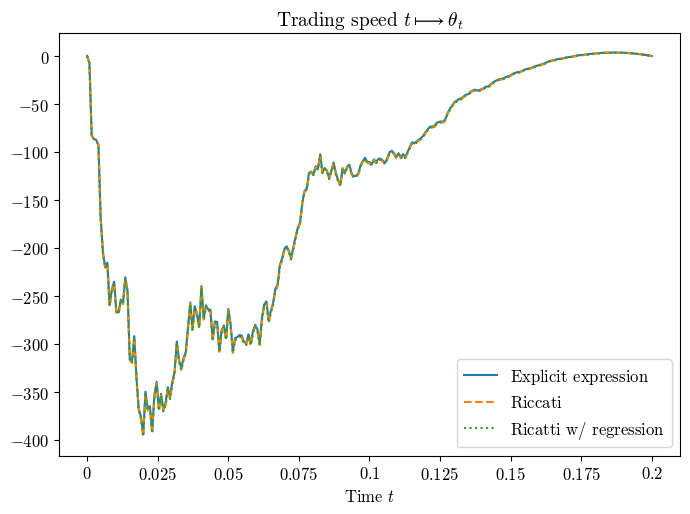

In [96]:
fig, ax = plt.subplots(figsize=(7,5.25))

ax.plot(t_grid, theta_close[n_test], label = r"$\text{Explicit expression}$")
ax.plot(t_grid, theta_traj[0], label = r"$\text{Riccati}$", linestyle ="--")
ax.plot(t_grid, theta_test[n_test], label = r"$\text{Ricatti w/ regression}$", linestyle =":")

ax.set_xlabel(r"$\text{Time }t$", fontsize=12)
ax.tick_params(axis='both', labelsize=12)
ax.set_title(r"$\text{Trading speed }t\longmapsto\theta_t$", fontsize=14)
ax.xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax.yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

### II.3 P\&L ($R_T^\theta$) density 

Moreover, to highlight the benefits of incorporating the permanent market impact information into the
trading strategy, we compare the $\text{P\&L}$ generated by two traders, when $\nu>0$. 

The first one is aware of the permanent market impact, incorporates this information into her strategy and follows the optimal trading speed for $\nu>0$. The second one ignores the permanent impact and follows the explicit trading strategy assuming $\nu = 0$ (we emphasize this latter is explicit).

We assume that both traders have the same risk aversion and ask an indifference price to hedge the option. Therefore, the trader assuming $\nu>0$ asks a price $\pi(\nu>0)$ while the second trader, ignoring the permanent impact, asks $\pi(\nu=0)$. Both traders’ strategies are evaluated using the
same criterion with $\nu>0$: the first trader’s strategy is optimal, whereas the second trader’s is not.

Recall that the $\text{P\&L}$ at time $T$ is defined as 

$$R_T^\theta = V_0 - X_0S_0 + X_T^\theta P_T^\theta - \int_0^T \widetilde P_t^\theta \theta_t \, dt - H_T^\theta,$$ 
with $V_0 = \xi_0^{\color{navy}{\mathord{\text{o}\!\!/\ }}} + \psi_0^{\color{navy}{\mathord{\text{o}\!\!/\ }}} = \pi$ (because $C=0$ in our setting). In other words, the initial portfolio value $V$ is equal to this indifference price $\pi$. 

In [98]:
N_mc = 10000
W = generate_brownian_paths(N_mc, n, T)

In [100]:
## explicit strategy without permanent market impact (nu=0)
nu = 0

d = 2
_, xi_t, _, _ = compute_tilde_xi_t(T, n, sigma, xi, d, M)
X_close, S_close, P_close, theta_close = compute_theta_closed_asian(T, S0, x0, mu, sigma, eta, nu, lambd, xi, W, M)
integrales_close = last_integrale(P_close, T, log=False)
H_close = N * (integrales_close - K)**2
V0 = xi_t[0,0] + psi_traj[0][0,0] 
R_close = compute_R_T(T, S0, x0, sigma, eta, V0, X_close, P_close, theta_close, H_close)

#### $\nu = 0.0005$

In [102]:
nu = nu_values[1]
X, S, P, theta = compute_theta(T, S0, x0, mu, sigma, eta, nu, lambd, psi_traj[1], xi, W, M, verbose=True)
integrales = last_integrale(P, T, log=False)
H = N * (integrales - K)**2

100%|█████████████████████████████████████████| 252/252 [02:49<00:00,  1.49it/s]


In [104]:
V0 = xi_t[0,0] + psi_traj[1][0,0]

In [106]:
R_0005 = compute_R_T(T, S0, x0, sigma, eta, V0, X, P, theta, H)

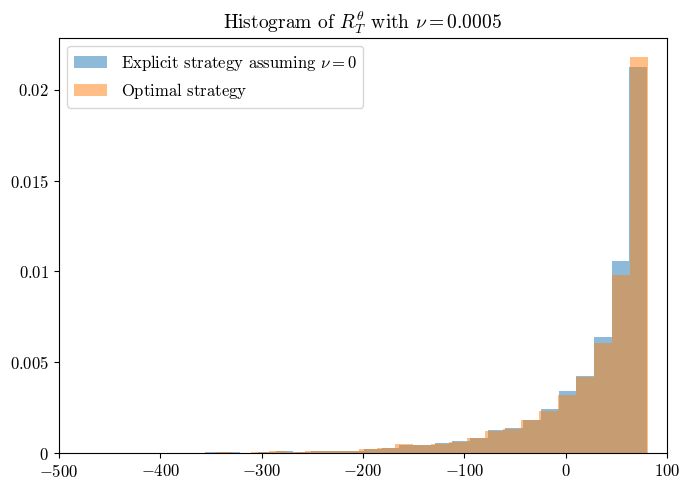

In [146]:
plot_histogram_R(R_0005, R_close, bins=50, title=r"$\text{Histogram of }R_T^\theta \text{ with }\nu = 0.0005$", left_x=-500, right_x=100)

#### $\nu = 0.001$

In [111]:
nu = nu_values[2]
X, S, P, theta = compute_theta(T, S0, x0, mu, sigma, eta, nu, lambd, psi_traj[2], xi, W, M, verbose=True)
integrales = last_integrale(P, T, log=False)
H = N * (integrales - K)**2

100%|█████████████████████████████████████████| 252/252 [02:45<00:00,  1.52it/s]


In [117]:
V0 = xi_t[0,0] + psi_traj[2][0,0]

In [119]:
R_001 = compute_R_T(T, S0, x0, sigma, eta, V0, X, P, theta, H)

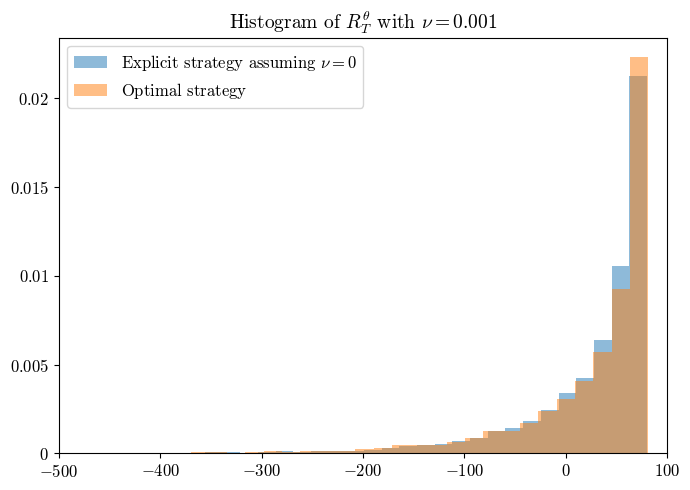

In [148]:
plot_histogram_R(R_001, R_close, bins=50, title=r"$\text{Histogram of }R_T^\theta \text{ with }\nu = 0.001$", left_x=-500, right_x=100)

#### $\nu = 0.0015$

In [126]:
nu = nu_values[3]
X, S, P, theta = compute_theta(T, S0, x0, mu, sigma, eta, nu, lambd, psi_traj[3], xi, W, M, verbose=True)
integrales = last_integrale(P, T, log=False)
H = N * (integrales - K)**2

100%|█████████████████████████████████████████| 252/252 [02:45<00:00,  1.52it/s]


In [128]:
V0 = xi_t[0,0] + psi_traj[3][0,0]

In [130]:
R_0015 = compute_R_T(T, S0, x0, sigma, eta, V0, X, P, theta, H)

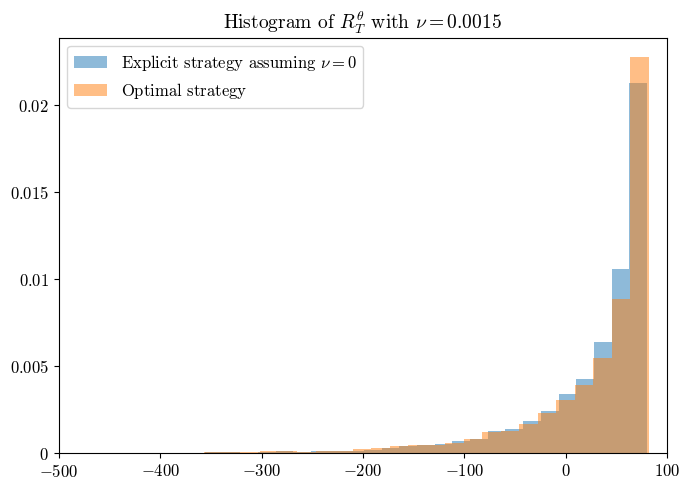

In [150]:
plot_histogram_R(R_0015, R_close, bins=50, title=r"$\text{Histogram of }R_T^\theta \text{ with }\nu = 0.0015$", left_x=-500, right_x=100, save=True)

#### Common figure

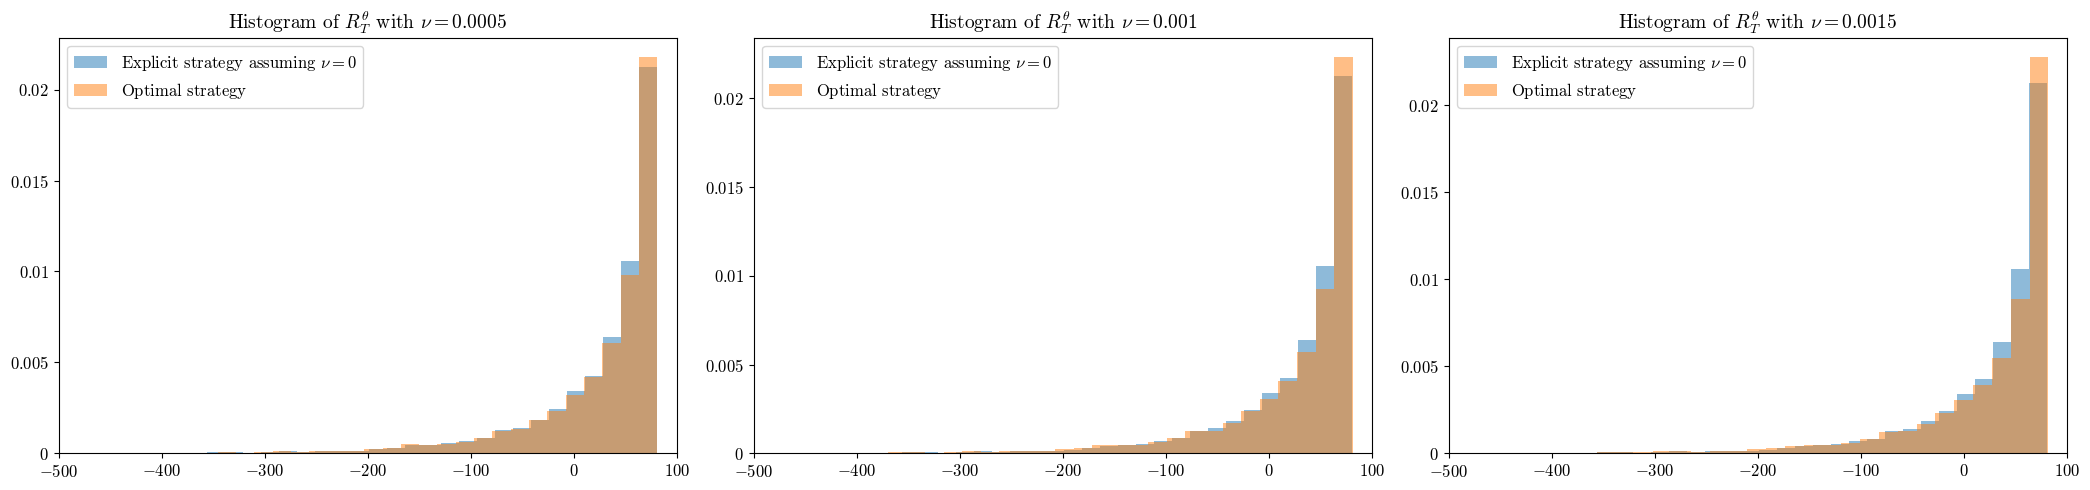

In [178]:
fig, ax = plt.subplots(1, 3, figsize=(7*3, 5))
bins = 50 
left_x, right_x = -500, 100

ax[0].hist(R_close, bins=bins, density=True, color="tab:blue", alpha=0.5, label=r"$\text{Explicit strategy assuming }\nu = 0$")
ax[1].hist(R_close, bins=bins, density=True, color="tab:blue", alpha=0.5, label=r"$\text{Explicit strategy assuming }\nu = 0$")
ax[2].hist(R_close, bins=bins, density=True, color="tab:blue", alpha=0.5, label=r"$\text{Explicit strategy assuming }\nu = 0$")


ax[0].hist(R_0005, bins=bins, density=True, color="tab:orange", alpha=0.5, label=r"$\text{Optimal strategy}$")
ax[1].hist(R_001, bins=bins, density=True, color="tab:orange", alpha=0.5, label=r"$\text{Optimal strategy}$")
ax[2].hist(R_0015, bins=bins, density=True, color="tab:orange", alpha=0.5, label=r"$\text{Optimal strategy}$")

ax[0].set_title(r"$\text{Histogram of }R_T^\theta \text{ with }\nu = 0.0005$", fontsize=14)
ax[1].set_title(r"$\text{Histogram of }R_T^\theta \text{ with }\nu = 0.001$", fontsize=14)
ax[2].set_title(r"$\text{Histogram of }R_T^\theta \text{ with }\nu = 0.0015$", fontsize=14)

for i in range(3) : 
    ax[i].set_xlim(left_x, right_x)
    ax[i].tick_params(axis='both', labelsize=12)
    ax[i].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
    ax[i].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
    ax[i].legend(fontsize=12)
    
plt.tight_layout()
plt.show()

We can see that, when there is a permanent market impact, there is an advantage to be
gained by incorporating this information into the hedging strategy and following the signature-based strategy
assuming $\nu>0$, rather than the strategy assuming only a temporary impact. Obviously, this information
gain depends on the size of the permanent impact parameter $\nu$ and will be higher when the permanent impact
is higher. The gap between the two P&Ls can be attributed to two things: 
- the trader omitting the permanent impact will misprice the option, underestimates the risk (see the discrepancy between the indifference prices). This will affect the final value of the $\text{P\&L}$.
- the trader who overlooks the permanent impact will trade too aggressively, and push
the price further in the wrong direction, which will adversely impact his $\text{P\&L}$ over time. The optimal
strategy with $\nu>0$, taking into account this impact, attempts to push the price in the right direction.
